In [9]:
import pandas as pd
import os as os
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib
import statistics as stats

# Plotting libraries
import matplotlib.pyplot as plt

In [10]:
#Please change the root directory while running this code
os.chdir("C:/PHD")
%run Library_list.ipynb

# Problem Statement

Problem is based on the Hotel Predictions for the users so the user can chose a hotel to stay by looking at the hotel reviews given by previous visitors.

Our goal is to develop a framework which could help the hoteliers to develop their business and think about cost cutting concerns on the days of high frequncy/low frequency of customers. This could enable hotel management make a price change based on a occassion or a normal day so it can matain the maximum occupancy. The occupancy can increased by automated messaging to the previous customers who have visited the hotel so they the can recommend new customers which can inturn improve the customer count. Hotel can also recommend the locations/ vacation spots nearbuy based on the previous customer tastes.

Analytics would help builiding more efficient hotel location management, branding, also it could make easier for new upcoming hotels to chose a feasible location to contruct.



 
# Data Visualizations

-We are plotting different uses cases for determining the relations between the features of training data

-From Plotting visualizations we can understand the importance or significance of the features so we can utilise or eliminate the features while buliding the models



# Identifications

-AverageOverallRatingOfHotel is determined by AveragePricing

-Getting the counts of sentiments wrt to month, day and year are some of the useful observations 
for determining the popularity of the hotel.

-Distribution of the datasets by grouping month or day or year wrt sentiment is useful for checking the sparsity
of the data(checking skewness and kurtosis)

-Seasonal occupancy of the hotels is important for the budget (say new year/christmas/thanks giving) so the hotels can improve their infrastructure and rise the margin price on each customer than before.

In [11]:
hotelData = pd.read_csv("NewHotels_CutstomerVisitsdata-1554810098964.csv")

In [12]:
existingHotelData = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv")

In [13]:
trainData = pd.read_csv("Train-1554810061973.csv")

In [14]:
hotelData.dtypes

Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                  object
dtype: object

In [15]:
existingHotelData.dtypes

Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                  object
dtype: object

In [16]:
trainData.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
dtype: object

In [17]:
trainData.isnull().sum()

Reviewid      0
Hotelid       0
userid        0
Date          0
reviewtext    0
Sentiment     0
dtype: int64

In [18]:
existingHotelData.corr()

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel
NoOfReaders,1.000000,0.916067,-0.084259,-0.084512,-0.354353,-0.094113,-0.352167,-0.077785,-0.229122,0.076035
HelpfulToNoOfreaders,0.916067,1.000000,-0.029713,-0.037711,-0.347817,-0.050633,-0.338157,-0.030493,-0.226600,0.074798
Value_rating,-0.084259,-0.029713,1.000000,0.865596,0.551055,0.865344,0.598025,0.810780,0.383428,0.162185
Rooms_rating,-0.084512,-0.037711,0.865596,1.000000,0.582585,0.914693,0.613752,0.824643,0.413479,0.195634
Location_rating,-0.354353,-0.347817,0.551055,0.582585,1.000000,0.597234,0.896511,0.540609,0.577139,0.086268
Cleanliness_rating,-0.094113,-0.050633,0.865344,0.914693,0.597234,1.000000,0.628344,0.840572,0.419283,0.187477
Checkin_rating,-0.352167,-0.338157,0.598025,0.613752,0.896511,0.628344,1.000000,0.612138,0.585372,0.122042
Service_rating,-0.077785,-0.030493,0.810780,0.824643,0.540609,0.840572,0.612138,1.000000,0.398973,0.178021
Businessservice_rating,-0.229122,-0.226600,0.383428,0.413479,0.577139,0.419283,0.585372,0.398973,1.000000,0.082226
AverageOverallRatingOfHotel,0.076035,0.074798,0.162185,0.195634,0.086268,0.187477,0.122042,0.178021,0.082226,1.000000


In [19]:
trainData.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
dtype: object

In [21]:
df2 = trainData.copy()
df2['Sentiment'] = df2['Sentiment'].astype('category')
# df['Hotelid'] = df2['Hotelid'].astype('category')

In [22]:
df2.head(2)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,16-Nov-07,Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,30-Oct-07,"Good hotel, charges for internet access The Ma...",good


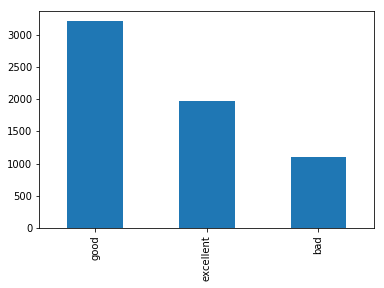

In [23]:
df2['Sentiment'].value_counts().plot(kind='bar')

In [24]:
df2.dtypes

Reviewid        object
Hotelid         object
userid          object
Date            object
reviewtext      object
Sentiment     category
dtype: object

In [25]:
#Getting Year, Month, Day from data
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.DatetimeIndex(df2['Date']).day

Plotting Count of sentiment vs Month

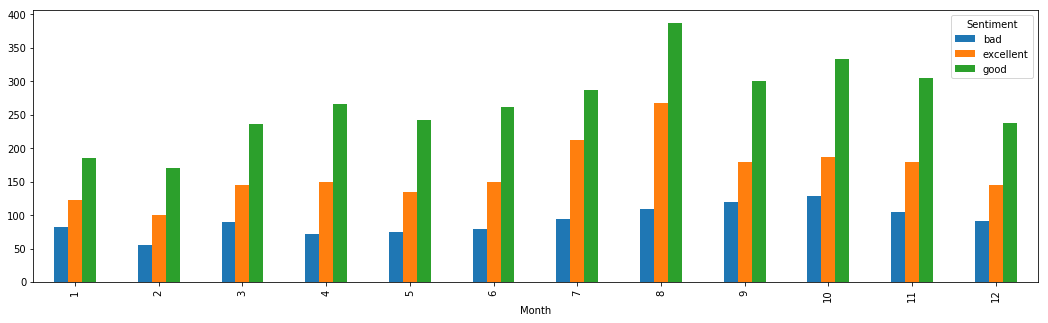

In [26]:
df2.groupby(['Month', 'Sentiment']).size().unstack().plot.bar(figsize=(18,5))

In [153]:
df2['Sentiment'].value_counts()

good         3213
excellent    1971
bad          1103
Name: Sentiment, dtype: int64

In [28]:
months = df2.Month.unique()
counts_sentiment = df2.groupby(['Month','Sentiment']).size()

In [29]:
counts_sentiment_scatter = df2[['Month','Sentiment']].groupby(['Month','Sentiment']).size().reset_index(name='secounts')

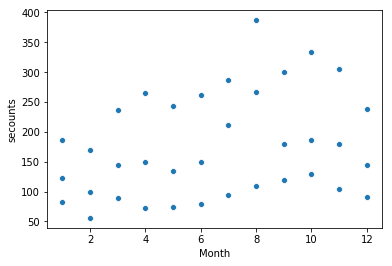

In [30]:
ax1 = sns.scatterplot(x="Month", y="secounts", data=counts_sentiment_scatter)

Plotting Stacked bar for Good, Bad, Excellent rating wrt Month

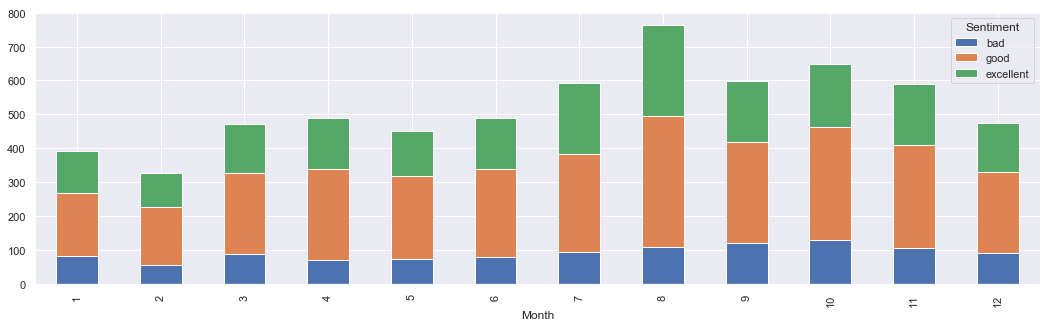

In [157]:
df5 = df2.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Plotting Stacked bar for Good, Bad, Excellent rating wrt Year

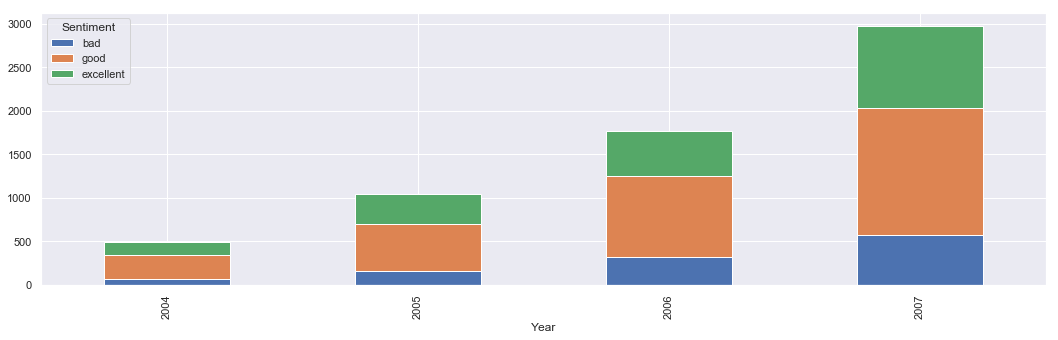

In [158]:
df5 = df2.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Plotting Stacked bar for Good, Bad, Excellent rating wrt Day

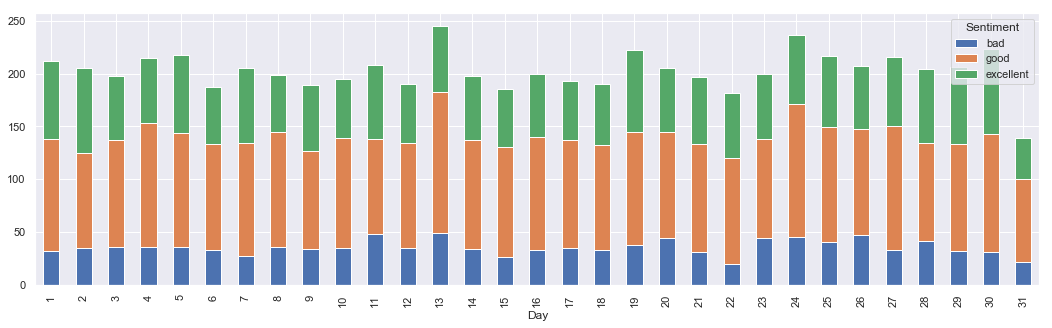

In [159]:
df5 = df2.groupby(['Day', 'Sentiment'])['Day'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Plotting Count of sentiment on yearly basis

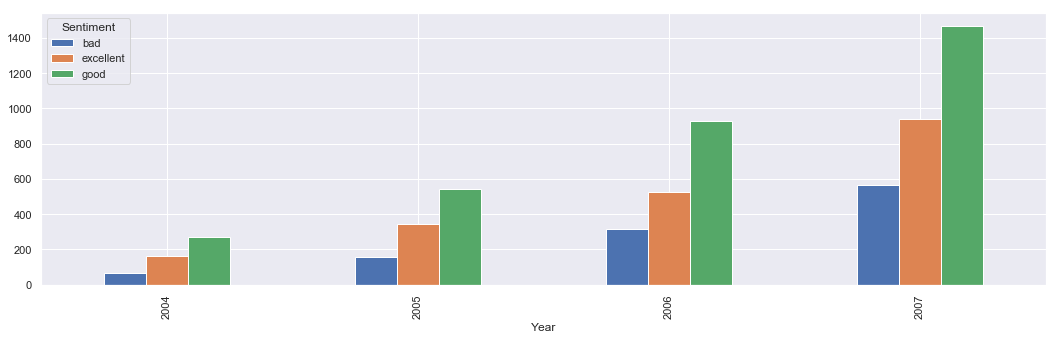

In [160]:
df2.groupby(['Year', 'Sentiment']).size().unstack().plot.bar(figsize=(18,5))

Plotting Value Counts of Sentiment wrt Month

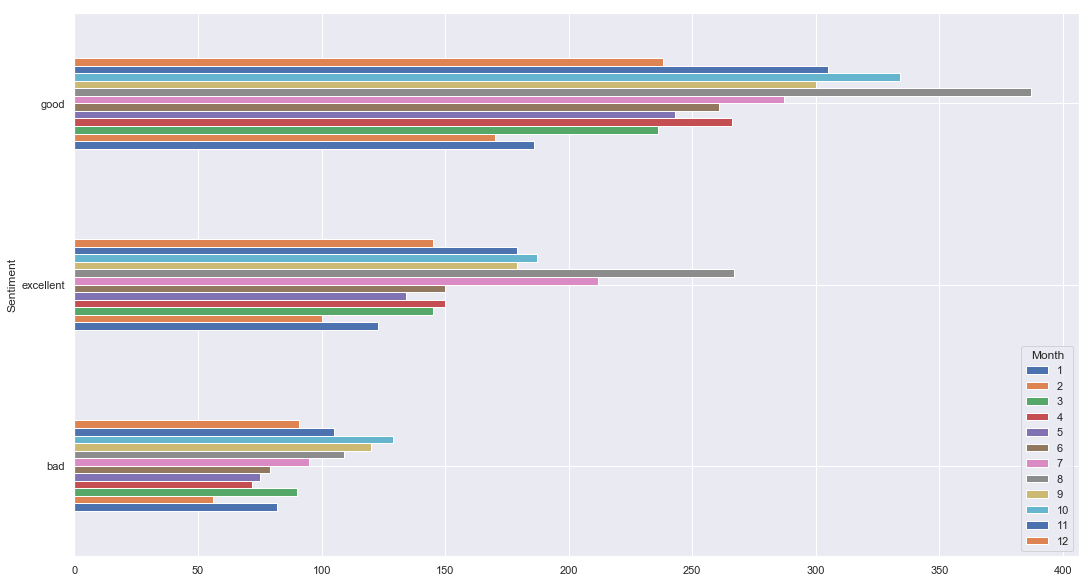

In [161]:
df2.groupby('Month').Sentiment.value_counts().unstack(0).plot.barh(figsize=(18,10))

In [163]:
df2.head(3)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,Year,Month,Day
0,Review_1,hotel_101,hotel_1608,16-Nov-07,Nice Marriot View of my king bed room,good,2007,11,16
1,Review_2,hotel_101,hotel_6939,30-Oct-07,"Good hotel, charges for internet access The Ma...",good,2007,10,30
2,Review_3,hotel_101,hotel_3976,12-Oct-07,Small but adequate rooms If you have an early ...,good,2007,10,12


In [164]:
df2.dtypes

Reviewid        object
Hotelid         object
userid          object
Date            object
reviewtext      object
Sentiment     category
Year             int64
Month            int64
Day              int64
dtype: object

In [165]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [166]:
df2.head(10)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,Year,Month,Day
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,16
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,2007,10,30
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,2007,10,12
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,31
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,2007,7,18
5,Review_6,hotel_101,hotel_3297,2007-07-13,Awesome for early AM flight Wow! what a supris...,excellent,2007,7,13
6,Review_7,hotel_101,hotel_5463,2007-07-04,Good Stay Spent two nights there in Jun. The h...,good,2007,7,4
7,Review_8,hotel_101,hotel_9766,2007-06-14,Great Staff We stayed overnight the last week ...,excellent,2007,6,14
8,Review_9,hotel_101,hotel_7042,2007-06-13,fine choice for seatac The lobby is attractive...,good,2007,6,13
9,Review_10,hotel_101,hotel_9805,2007-05-30,"Great value, looking for a nice hotel. not exp...",good,2007,5,30


# Checking Sentiment during Christmas, New Year

In [167]:
df4 = df2.loc[df2['Date'].isin(['2007-12-26','2007-12-01','2007-01-01', '2006-12-26','2006-12-01','2006-01-01', '2005-12-26','2005-12-01','2005-01-01','2004-12-26','2004-12-01','2004-01-01'])]

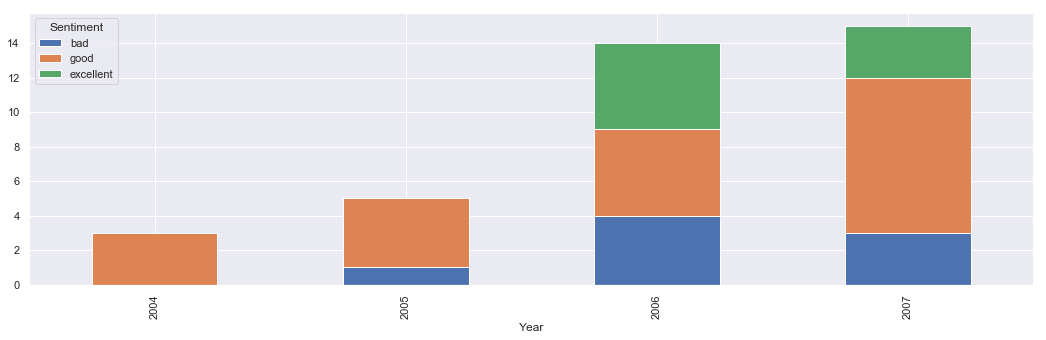

In [168]:
df5 = df4.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

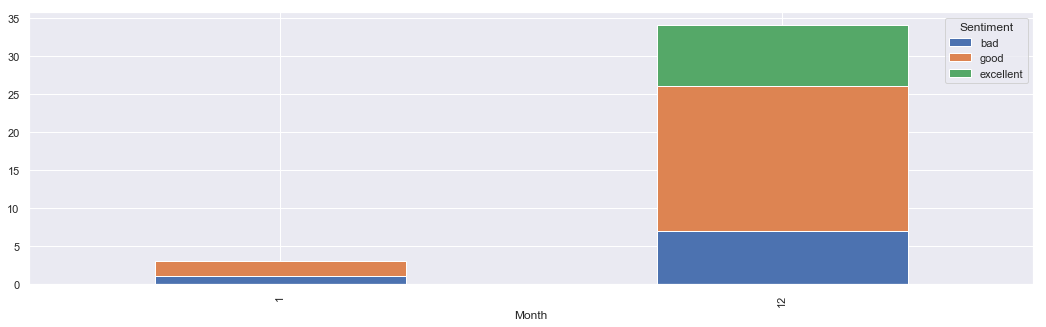

In [169]:
df5 = df4.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

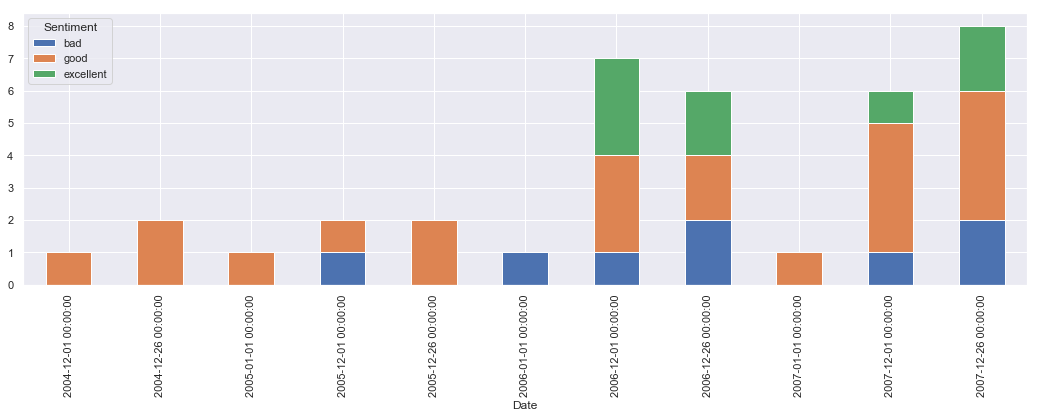

In [170]:
df5 = df4.groupby(['Date', 'Sentiment'])['Date'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

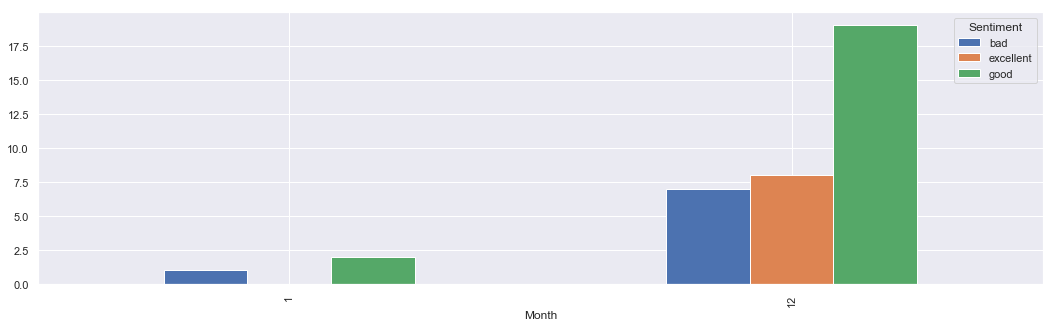

In [171]:
df4.groupby(['Month', 'Sentiment']).size().unstack().plot.bar(figsize=(18,5))

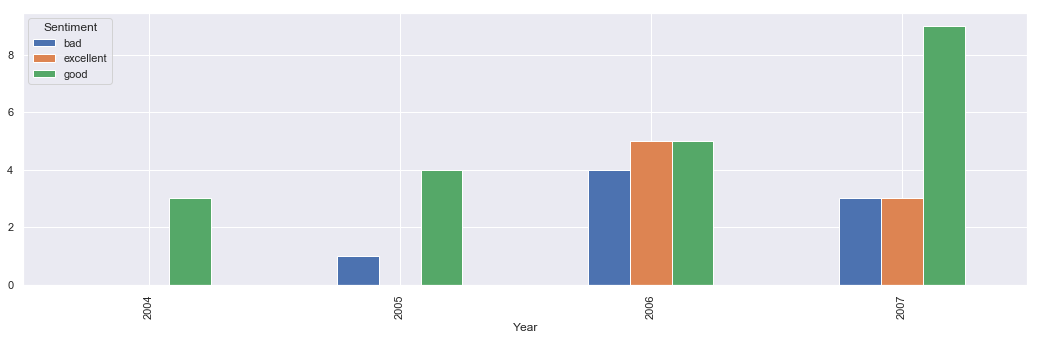

In [172]:
df4.groupby(['Year', 'Sentiment']).size().unstack().plot.bar(figsize=(18,5))

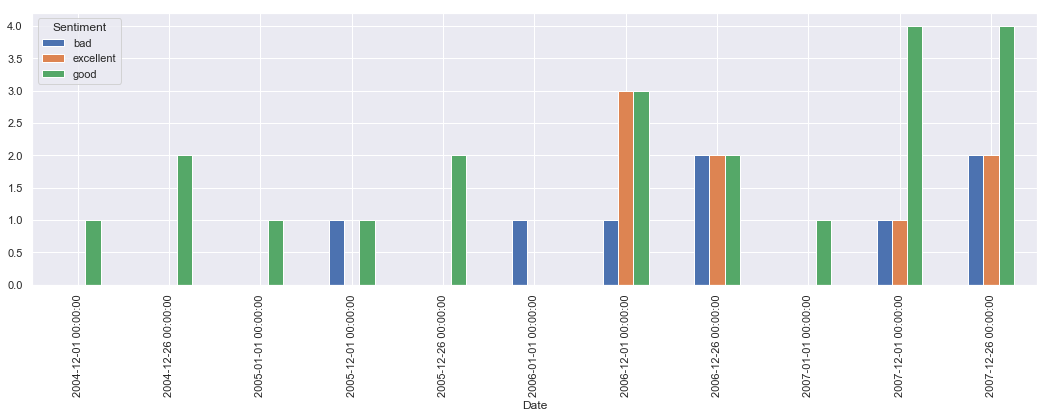

In [173]:
df4.groupby(['Date', 'Sentiment']).size().unstack().plot.bar(figsize=(18,5))

Checking for distribution if the Data for New Year and Christmas seasons

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



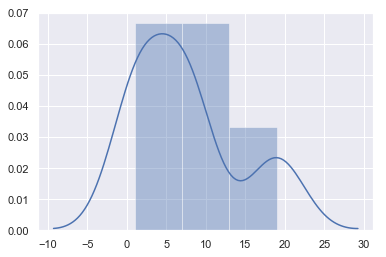

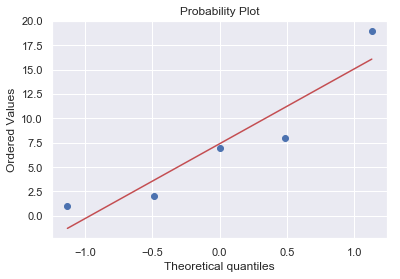

In [174]:
sns.distplot(df4.groupby(['Month', 'Sentiment']).size())

fig = plt.figure()
res = stats.probplot(df4.groupby(['Month', 'Sentiment']).size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



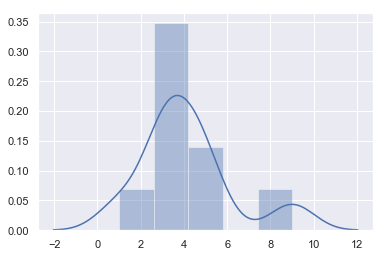

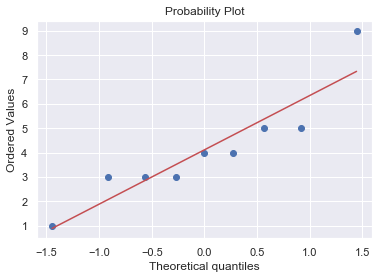

In [175]:
sns.distplot(df4.groupby(['Year', 'Sentiment']).size())

fig = plt.figure()
res = stats.probplot(df4.groupby(['Year', 'Sentiment']).size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



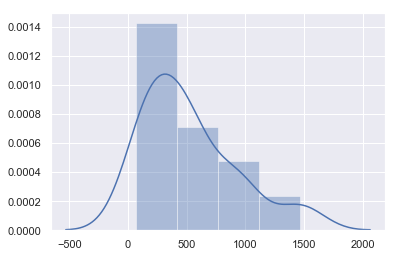

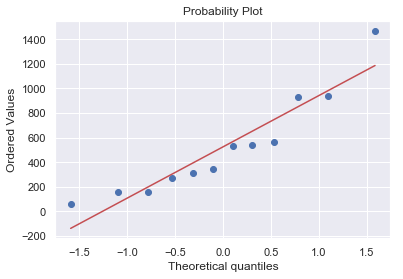

In [176]:
sns.distplot(df2.groupby(['Year', 'Sentiment']).size())

fig = plt.figure()
res = stats.probplot(df2.groupby(['Year', 'Sentiment']).size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



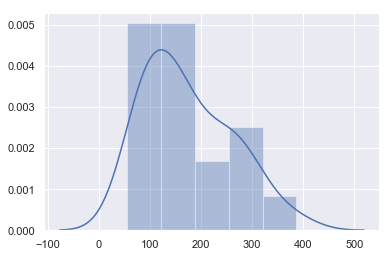

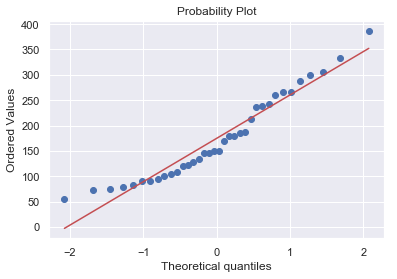

In [177]:
sns.distplot(df2.groupby(['Month', 'Sentiment']).size())

fig = plt.figure()
res = stats.probplot(df2.groupby(['Month', 'Sentiment']).size(), plot = plt)

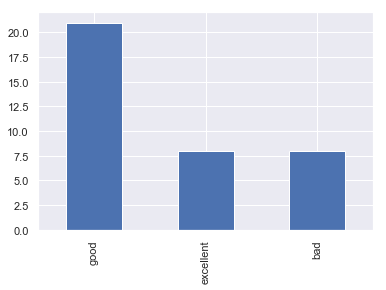

In [178]:
df4['Sentiment'].value_counts().plot(kind='bar')

Checking the sentiment for Hotel based on the user reviews

-From the obseravtions we can see that Hotel_188 has good number reviews compared to other hotels,
so I wanted to check the performance of the Hotel by visualising various attributes

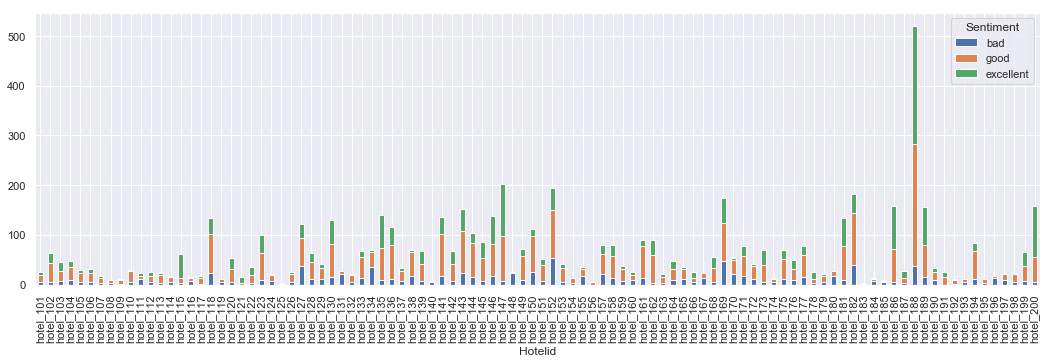

In [179]:
df5 = df2.groupby(['Hotelid', 'Sentiment'])['Hotelid'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

In [46]:
# # df2.set_index('Date', inplace=True
# df2.groupby(['Date', 'Sentiment'])['Date'].size().plot(legend=True)

# Checking Quaterly performance of Hotel_188

In [180]:


dfFirstQuarter = df2.loc[df2['Month'].isin([1,2,3,4])]
dfFirstQuarter_1 = dfFirstQuarter.loc[dfFirstQuarter['Hotelid'].isin(['hotel_188'])]

dfSecondQuarter = df2.loc[df2['Month'].isin([5,6,7,8])]
dfSecondQuarter_1 = dfSecondQuarter.loc[dfSecondQuarter['Hotelid'].isin(['hotel_188'])]

dfThirdQuarter = df2.loc[df2['Month'].isin([9,10,11,12])]
dfThirdQuarter_1 = dfThirdQuarter.loc[dfThirdQuarter['Hotelid'].isin(['hotel_188'])]

Checking for performance of the Hotel during firstQuarter by month

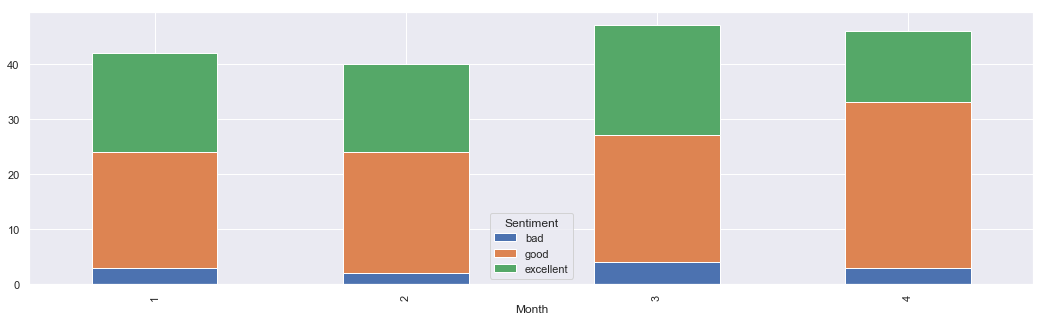

In [181]:
df5 = dfFirstQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Checking for performance of the Hotel during secondQuarter by month

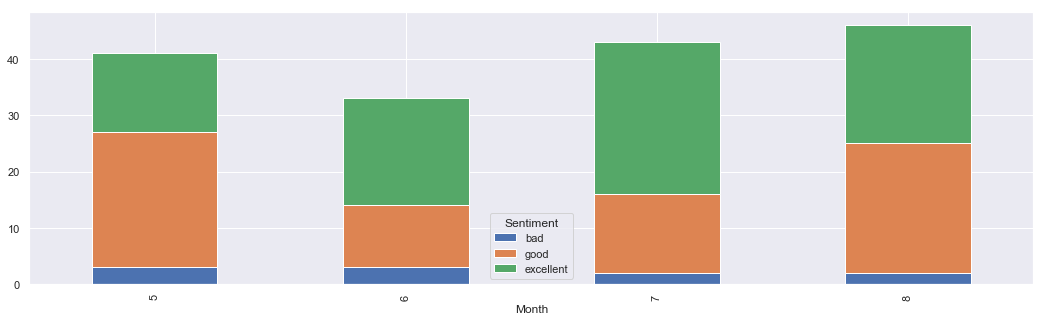

In [182]:
df5 = dfSecondQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Checking for performance of the Hotel during thirdQuarter by month

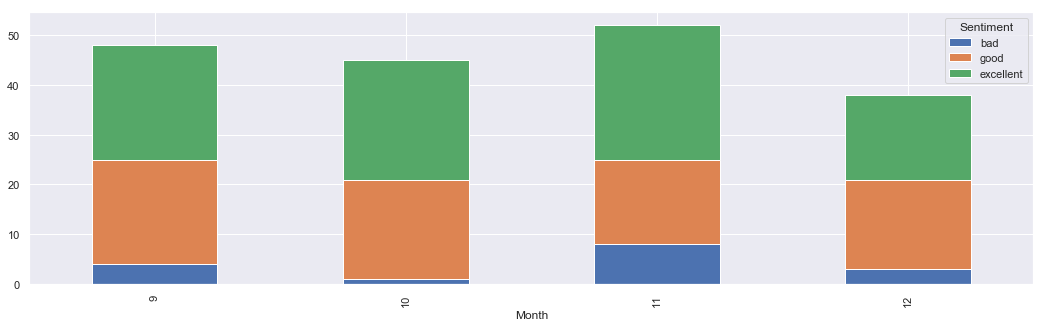

In [183]:
df5 = dfThirdQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Checking for performance of the Hotel during firstQuarter by Year

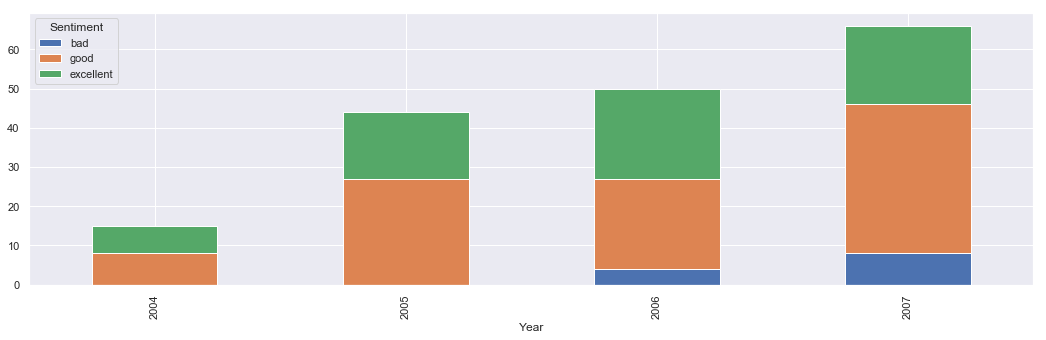

In [184]:
df5 = dfFirstQuarter_1.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

Checking for performance of the Hotel during secondQuarter by Year

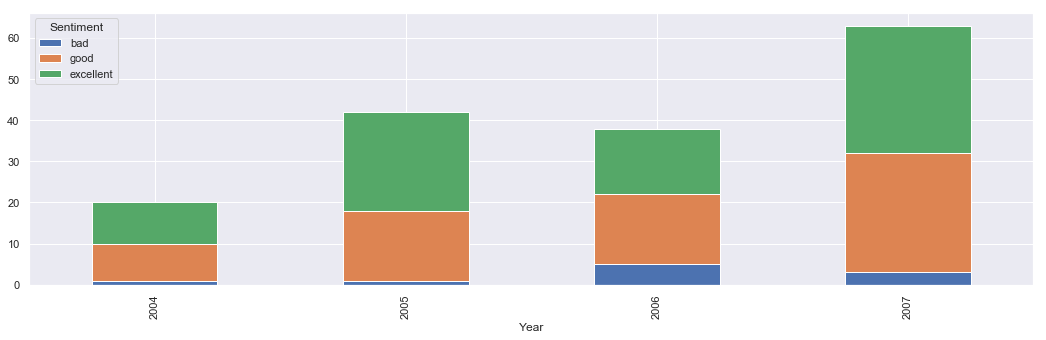

In [185]:
df5 = dfSecondQuarter_1.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='bar', stacked=True, figsize=(18,5))

# Trends of Hotel by Month and Year

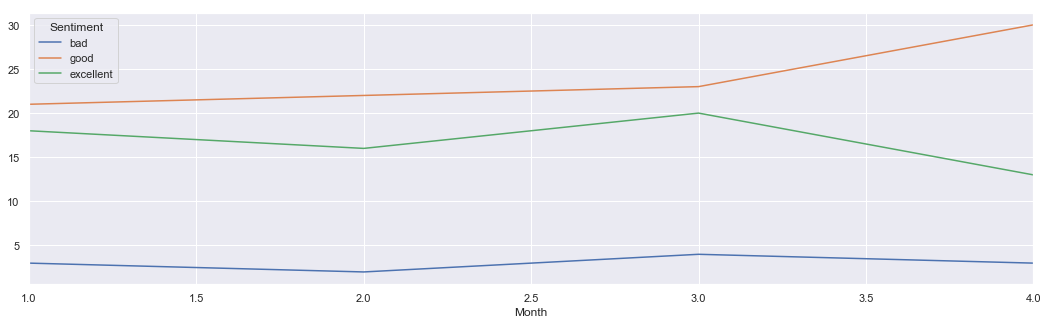

In [186]:
df5 = dfFirstQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

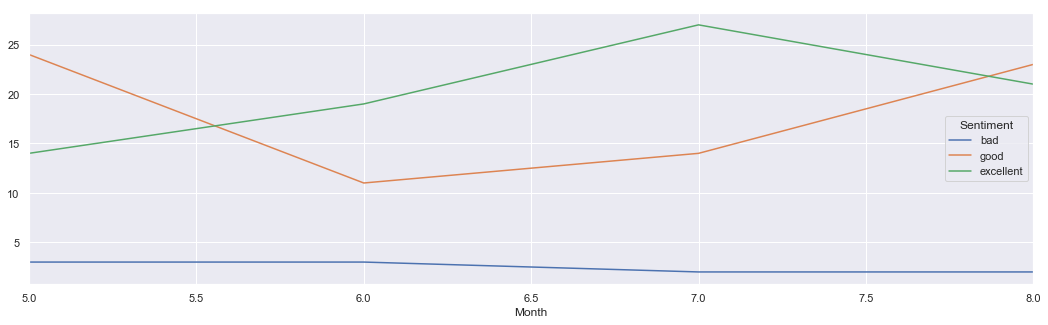

In [187]:
df5 = dfSecondQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

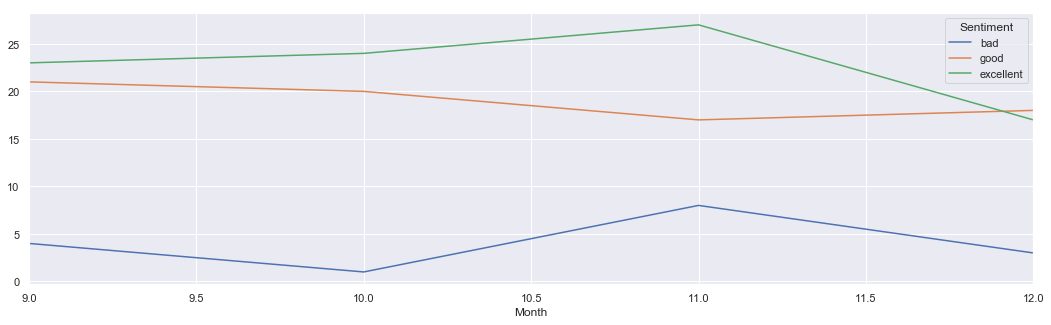

In [188]:
df5 = dfThirdQuarter_1.groupby(['Month', 'Sentiment'])['Month'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

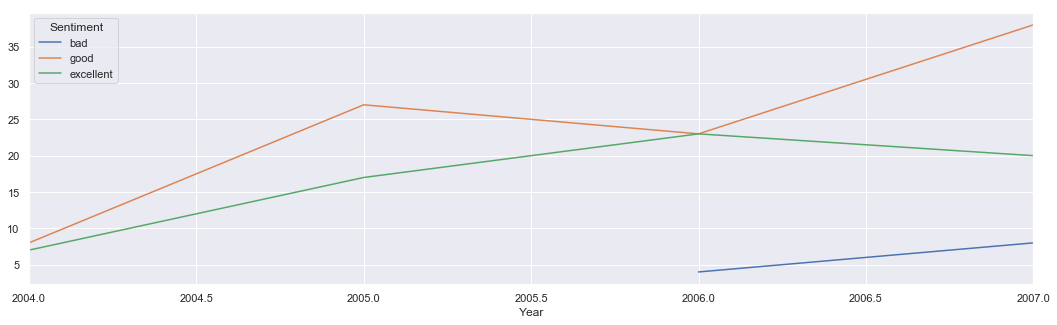

In [189]:
df5 = dfFirstQuarter_1.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

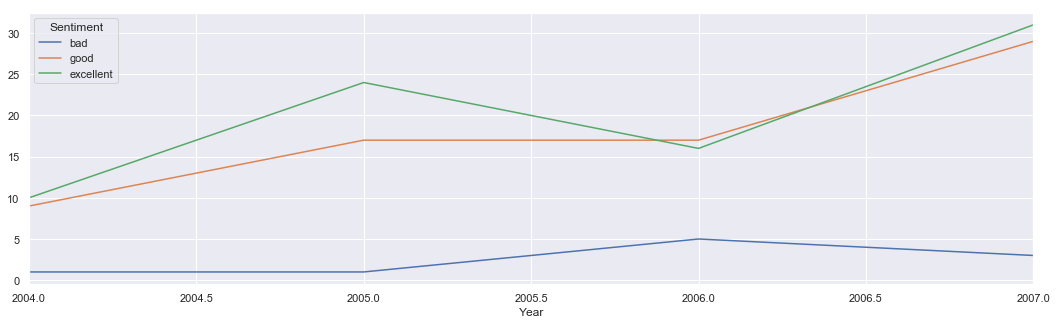

In [190]:
df5 = dfSecondQuarter_1.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

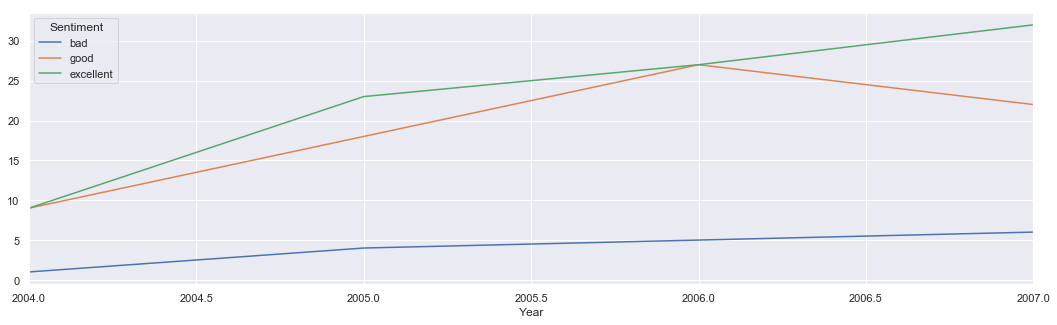

In [191]:
df5 = dfThirdQuarter_1.groupby(['Year', 'Sentiment'])['Year'].count().unstack('Sentiment')
df5[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))

Distribution of Data during first, second and third quarters of the year

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



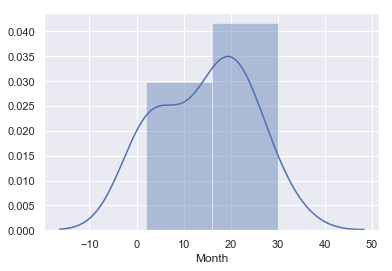

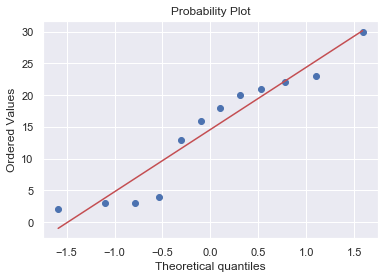

In [192]:
sns.distplot(dfFirstQuarter_1.groupby(['Month', 'Sentiment'])['Month'].size())

fig = plt.figure()
res = stats.probplot(dfFirstQuarter_1.groupby(['Month', 'Sentiment'])['Month'].size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



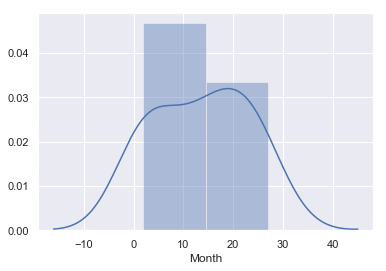

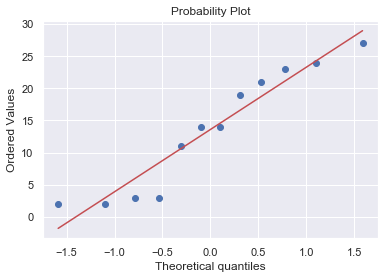

In [193]:
sns.distplot(dfSecondQuarter_1.groupby(['Month', 'Sentiment'])['Month'].size())

fig = plt.figure()
res = stats.probplot(dfSecondQuarter_1.groupby(['Month', 'Sentiment'])['Month'].size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



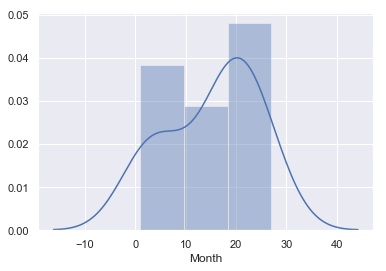

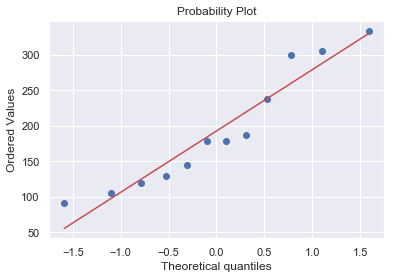

In [194]:
sns.distplot(dfThirdQuarter_1.groupby(['Month', 'Sentiment'])['Month'].size())

fig = plt.figure()
res = stats.probplot(dfThirdQuarter.groupby(['Month', 'Sentiment'])['Month'].size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



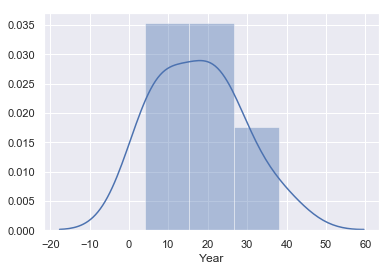

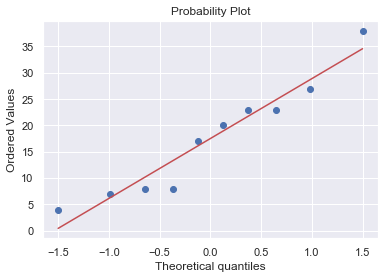

In [195]:
sns.distplot(dfFirstQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size())

fig = plt.figure()
res = stats.probplot(dfFirstQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



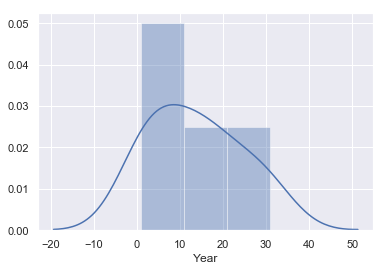

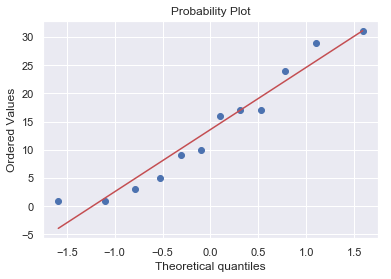

In [196]:
sns.distplot(dfSecondQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size())

fig = plt.figure()
res = stats.probplot(dfSecondQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size(), plot = plt)

C:\Users\CBPLDEV11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



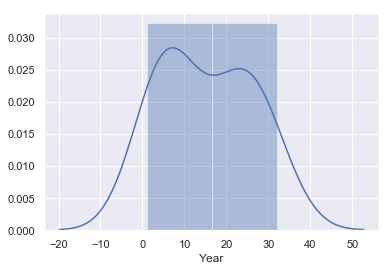

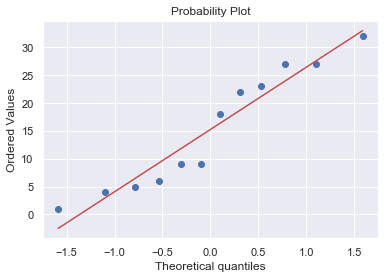

In [197]:
sns.distplot(dfThirdQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size())

fig = plt.figure()
res = stats.probplot(dfThirdQuarter_1.groupby(['Year', 'Sentiment'])['Year'].size(), plot = plt)

# Checking Yearly performance of Hotel_188

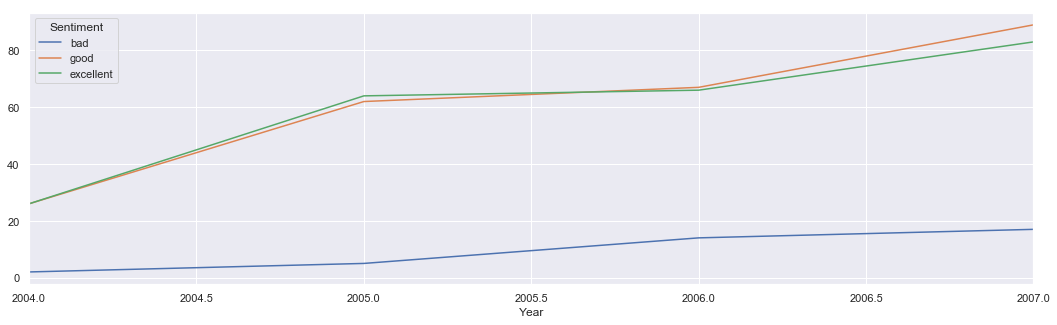

In [220]:
df8 = df2.groupby(['Hotelid', 'Sentiment','Year'])['Year'].size().unstack('Sentiment')
df7[['bad', 'good', 'excellent']].plot(kind='line', figsize=(18,5))